# Análise Estatística das Principais Variáveis Features

## Importando Bibliotecas e Configurando Ambiente de Trabalho

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

pd.set_option("display.max_columns", 29)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
import warnings

warnings.simplefilter(action="ignore")
%load_ext nb_black

<IPython.core.display.Javascript object>

## Carregando os Dados

In [2]:
df = pd.read_csv("cars_train.csv", encoding="utf-16", sep="\t")
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.00,67772.00,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59
1,279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.00,62979.00,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33
2,56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.00,44070.00,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81
3,56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.00,85357.00,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.36
4,338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.00,71491.00,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76


<IPython.core.display.Javascript object>

## Explorando os Dados

In [3]:
# Verificando o formato do dataset
df.shape

(29584, 29)

<IPython.core.display.Javascript object>

In [4]:
# Verificando os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

<IPython.core.display.Javascript object>

Vamos aplicar a nossa análise estatística apenas as variáveis numéricas, por isso iremos filtrar o nosso dataset, excluindo a variável "veiculo_alienado" por ser composto por apenas valores *missing*, e a nossa variável *target*, pois não nos interessa analisá-la agora.

In [5]:
# Filtrando nosso dataset
df = df[["num_fotos", "ano_de_fabricacao", "ano_modelo", "hodometro", "num_portas"]]
df.head()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas
0,8.00,2017,2017.00,67772.00,4
1,8.00,2017,2017.00,62979.00,4
2,16.00,2018,2019.00,44070.00,4
3,14.00,2013,2015.00,85357.00,4
4,8.00,2013,2015.00,71491.00,4


<IPython.core.display.Javascript object>

## Pré-Processamento dos Dados

In [6]:
# Analisando valores missing
df.isnull().sum()

num_fotos            177
ano_de_fabricacao      0
ano_modelo             0
hodometro              0
num_portas             0
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
# Analisando a variável num_fotos para preenchimento dos valores missing
df["num_fotos"].value_counts(normalize=True)

8.00    0.66
15.00   0.09
16.00   0.08
14.00   0.06
17.00   0.03
9.00    0.02
13.00   0.02
20.00   0.01
18.00   0.01
12.00   0.00
19.00   0.00
11.00   0.00
21.00   0.00
10.00   0.00
Name: num_fotos, dtype: float64

<IPython.core.display.Javascript object>

In [8]:
# Analisando as variáveis de tendência central
num_fotos_mean = df["num_fotos"].mean()
num_fotos_median = df["num_fotos"].median()

print(f"'media': {num_fotos_mean}, 'mediana': {num_fotos_median}")

'media': 10.323834461182711, 'mediana': 8.0


<IPython.core.display.Javascript object>

**Vamos escolher o valor 8 para preencher os valores missing, pois ele é a mediana e a moda da variável (com 66% dos registros)**

In [9]:
# Preenchendo os valores missing
df["num_fotos"] = df["num_fotos"].fillna(8)

<IPython.core.display.Javascript object>

In [10]:
# Analisando se a imputação deu certo
df.isnull().sum()

num_fotos            0
ano_de_fabricacao    0
ano_modelo           0
hodometro            0
num_portas           0
dtype: int64

<IPython.core.display.Javascript object>

## Aplicando a Análise Estatística 

Faremos uma análise descevrendo três estatísticas de medica central, e duas estatísticas de dispersão. 

As medidas de tendência central representam um valor central ou um valor típico dentro de um conjunto de valores. As medidas mais comuns e que usaremos aqui são:

**- Média: é a soma de todos registros dividos pelo número de registros. É afetado por valores outliers, o que a torna em muitos casos uma estatística pouco resistente.**

**- Mediana: é o valor central de um conjunto de valores ordenados de forma crescente. Neste caso, ela não é afetada por valores outlieres, o que a torna mais resistente.**

**- Moda: É o valor que mais se repete dentro de um conjunto.**

As medidas de dispersão nos indicam o quão espalhados estão nossos dados, ou como eles variam. Usaremos aqui as seguintes medidas de dispersão:

**- Desvio Padrão: indica o quanto os dados estão afastados da média. Um valor de desvio padrão alto indica que os valores estão mais dispersos e um valor mais baixo indica que os valores estão mais próximos da média.** 

**- Variância: indica o quanto os dados estão afastados de seu valor esperado. É o desvio padrão elevado ao quadrado.**

**- Amplitude: é a subtração entre o maior valor pelo menor valor do nosso conjunto de dados. Quanto mais alto for seu resultado, maior sinal de que os nossos estão mais dispersos.**

Também vamos utilizar na nossa análise os gráficos Boxplot e Histograma.

A escolha por utilizar o Boxplot é por ser um gráfico muito comlpleto no meu entendimento. A partir dele podemos ter insights referentes a distribuição da nossa variável, ao valor mínimo e valor máximo, aos percentis, a mediana, e ao que eu julgo uma das coisas mais interessantes neste tipo de gráfico, podemos analisar os outliers existentes na variável. Ele analisado juntamente com a função describe(), é uma poderosa ferramenta para anaĺise de nossas variáveis.

O Histograma é outro gráfico importante para nos dizer como está a distribuição dos nossos dados, julgo que ele é visualmente melhor que o Boxplot quando queremos analisar apenas esta informação. Através dele conseguimos rapidamente identificar se nosso gráfico é simẃtrico, assimétrico negativo ou assimétrico positivo.


In [11]:
# Resumo estatístico das variáveis
df.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas
count,29584.00,29584.00,29584.00,29584.00,29584.00
mean,10.31,2016.76,2017.81,58430.59,3.94
std,3.48,4.06,2.67,32561.77,0.34
min,8.00,1985.00,1997.00,100.00,2.00
25%,8.00,2015.00,2016.00,31214.00,4.00
50%,8.00,2018.00,2018.00,57434.00,4.00
75%,14.00,2019.00,2020.00,81953.50,4.00
max,21.00,2022.00,2023.00,390065.00,4.00


<IPython.core.display.Javascript object>

A função describe já nos oferece informações relevantes sobre as estatísticas de cada uma das variáveis. Mas vamos analisar cada uma das variáveis individualmente.

### Análise da Variável num_fotos

In [12]:
# Calculando as medidas de tendência central

# Média
mean_num_fotos = round(df["num_fotos"].mean(), 2)

# Mediana
median_num_fotos = df["num_fotos"].median()

# Moda
moda_num_fotos = statistics.mode(df["num_fotos"])

# Calculando as medias de dispersão

# Desvio Padrão
std_num_fotos = np.std(df["num_fotos"])
std_num_fotos = np.around(std_num_fotos, 2)

# Variância
var_num_fotos = np.var(df["num_fotos"])
var_num_fotos = np.around(var_num_fotos)

# Amplitude
amp_num_fotos = df["num_fotos"].max() - df["num_fotos"].min()

print(
    f" As estatísticas referentes a medidas de tendência central para a variável num_fotos são:\n Media: {mean_num_fotos}\n Mediana: {median_num_fotos}\n Moda: {moda_num_fotos}\n\n As estatísticas referentes a medidas de dispersão para a variável num_fotos são:\n Desvio Padrão: {std_num_fotos}\n Variância: {var_num_fotos}\n Amplitude: {amp_num_fotos}"
)

 As estatísticas referentes a medidas de tendência central para a variável num_fotos são:
 Media: 10.31
 Mediana: 8.0
 Moda: 8.0

 As estatísticas referentes a medidas de dispersão para a variável num_fotos são:
 Desvio Padrão: 3.48
 Variância: 12.0
 Amplitude: 13.0


<IPython.core.display.Javascript object>

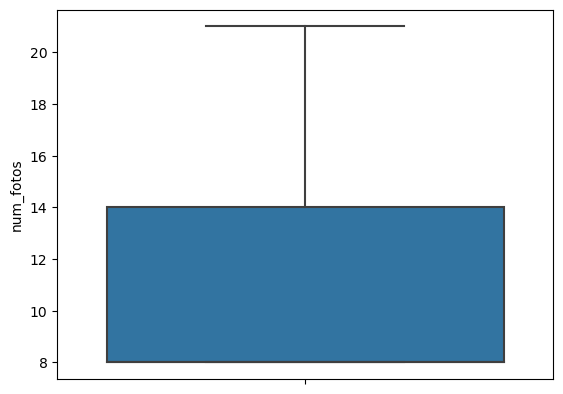

<IPython.core.display.Javascript object>

In [34]:
# Boxplot
sns.boxplot(y=df["num_fotos"])

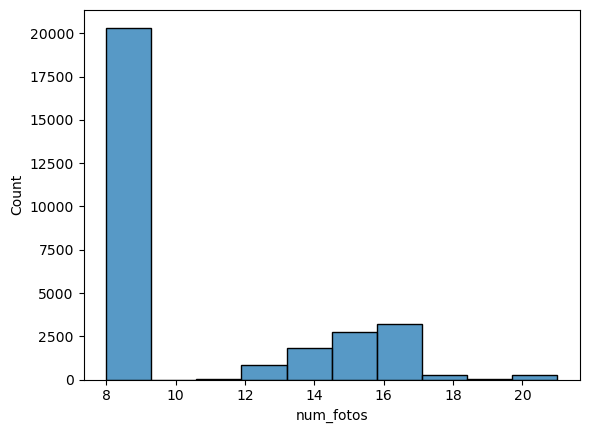

<IPython.core.display.Javascript object>

In [35]:
# Histograma
sns.histplot(df["num_fotos"], bins=10)

Como já analisamos na etapa de pré-processamento esta variável tem um amplo domínio de um registro específico, o número 8. Sendo assim, ele é tanto a moda como a mediana (pois esse valor aparece mais de 50% das vezes). 

Isto fica nítido quando analisamos o Boxplot onde o ponto do primeiro quartil e da mediana (segundo quartil) se sobrepõe, nos informando que a primeira metade dos nossos dados são compostos por um único valor, já a segunda metade possui valores mais dispersos. No Boxplot também podemos concluir que não existe outliers para esta variável. 

No Histograma fica bem nítido o peso do valor 8 na variável, e a conclusão de que temos uma distribuição que se aproxima de uma distribuição exponencial. Ele também ajuda a explicar pq a média é mais elevada do que a mediana, pois a média é impactada pelos demais valores acima de 8, enquanto a mediana não.

### Análise da Variável ano_de_fabricacao

In [15]:
# Calculando as medidas de tendência central

# Média
mean_ano_fabric = round(df["ano_de_fabricacao"].mean(), 2)

# Mediana
median_ano_fabric = df["ano_de_fabricacao"].median()

# Moda
moda_ano_fabric = statistics.mode(df["ano_de_fabricacao"])

# Calculando as medias de dispersão

# Desvio Padrão
std_ano_fabric = np.std(df["ano_de_fabricacao"])
std_ano_fabric = np.around(std_ano_fabric, 2)

# Variância
var_ano_fabric = np.var(df["ano_de_fabricacao"])
var_ano_fabric = np.around(var_ano_fabric, 2)

# Amplitude
amp_ano_fabric = df["ano_de_fabricacao"].max() - df["ano_de_fabricacao"].min()

print(
    f" As estatísticas referentes a medidas de tendência central para a variável num_fotos são:\n Media: {mean_ano_fabric}\n Mediana: {median_ano_fabric}\n Moda: {moda_ano_fabric}\n\n As estatísticas referentes a medidas de dispersão para a variável num_fotos são:\n Desvio Padrão: {std_ano_fabric}\n Variância: {var_ano_fabric}\n Amplitude: {amp_ano_fabric}"
)

 As estatísticas referentes a medidas de tendência central para a variável num_fotos são:
 Media: 2016.76
 Mediana: 2018.0
 Moda: 2020

 As estatísticas referentes a medidas de dispersão para a variável num_fotos são:
 Desvio Padrão: 4.06
 Variância: 16.5
 Amplitude: 37


<IPython.core.display.Javascript object>

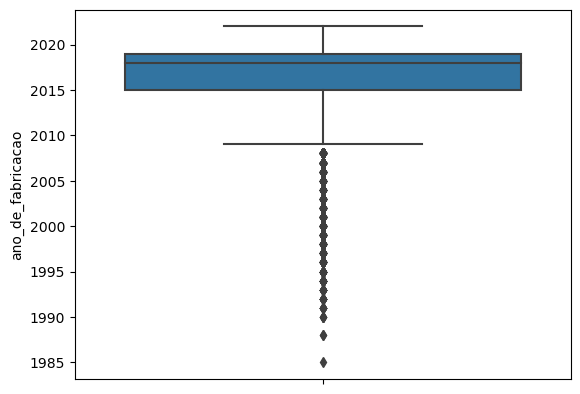

<IPython.core.display.Javascript object>

In [36]:
# Boxplot
sns.boxplot(y=df["ano_de_fabricacao"])

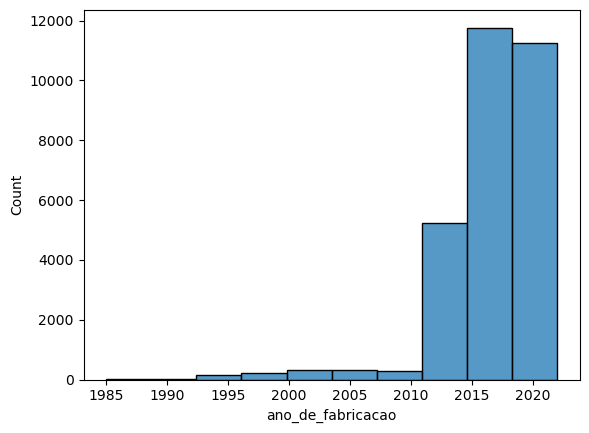

<IPython.core.display.Javascript object>

In [37]:
# Histograma
sns.histplot(df["ano_de_fabricacao"], bins=10)

Para a variável ano_de_fabricacao o Boxplot nos mostra a madiana muito próxima do 3º quartil, o que significa que a primeira metade dos dados da variável estão bem dispersos, e a segunda metade mais concentrados em poucos valores. Nesta variável ocorre a presença de valores outliers, o que provavelmente explique o valor da média abaixo do valor da mediana, pois estes valores pressionam a média para baixo. 

O Histograma nos confirma que os dados abaixo da mediana são mais dispersos, enquanto os dados acima dela são mais concentrados, podemos ver que a maioria dos dados se concentra esses os valores de 2015 a 2020. Sua distruição se aproxima de uma distribuição assimétrica negativa.

### Análise da Variável ano_modelo

In [18]:
# Calculando as medidas de tendência central

# Média
mean_ano_modelo = round(df["ano_modelo"].mean(), 2)

# Mediana
median_ano_modelo = df["ano_modelo"].median()

# Moda
moda_ano_modelo = statistics.mode(df["ano_modelo"])

# Calculando as medias de dispersão

# Desvio Padrão
std_ano_modelo = np.std(df["ano_modelo"])
std_ano_modelo = np.around(std_ano_modelo, 2)

# Variância
var_ano_modelo = np.var(df["ano_modelo"])
var_ano_modelo = np.around(var_ano_modelo, 2)

# Amplitude
amp_ano_modelo = df["ano_modelo"].max() - df["ano_modelo"].min()

print(
    f" As estatísticas referentes a medidas de tendência central para a variável num_fotos são:\n Media: {mean_ano_modelo}\n Mediana: {median_ano_modelo}\n Moda: {moda_ano_modelo}\n\n As estatísticas referentes a medidas de dispersão para a variável num_fotos são:\n Desvio Padrão: {std_ano_modelo}\n Variância: {var_ano_modelo}\n Amplitude: {amp_ano_modelo}"
)

 As estatísticas referentes a medidas de tendência central para a variável num_fotos são:
 Media: 2017.81
 Mediana: 2018.0
 Moda: 2021.0

 As estatísticas referentes a medidas de dispersão para a variável num_fotos são:
 Desvio Padrão: 2.67
 Variância: 7.15
 Amplitude: 26.0


<IPython.core.display.Javascript object>

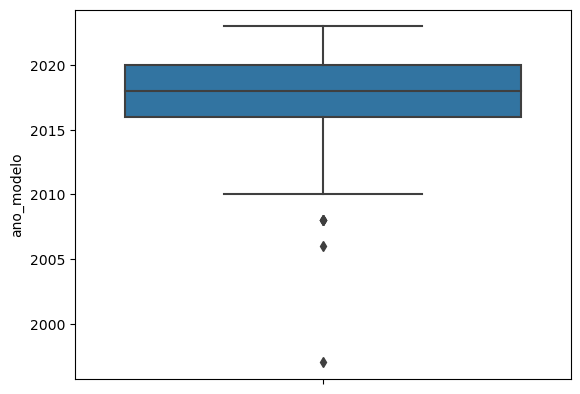

<IPython.core.display.Javascript object>

In [38]:
# Boxplot
sns.boxplot(y=df["ano_modelo"])

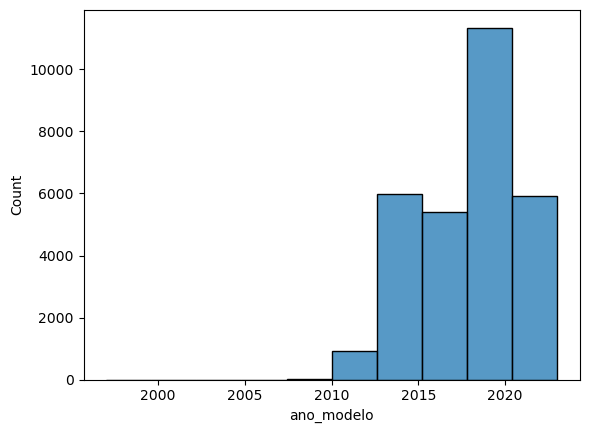

<IPython.core.display.Javascript object>

In [39]:
# Histograma
sns.histplot(df["ano_modelo"], bins=10)

Na variável ano_modelo podemos perceber os valores da média e mediana muito próximos, o que pode ser um indicativo que temos uma distribuição que se aproxima de uma distribuição normal.

O Boxplot confirma uma distribuição que se aproxima de uma distribuição normal, onde temos a mediana centralizada dentro da caixa azul. Ele também nos mostra a existência de alguns valores outliers, o que deve explicar uma média mais baixa que a mediana. 

No Histograma podemos uma concentração maior nos valores entre 2018 e 2020.




### Análise da Variável hodometro

In [21]:
# Calculando as medidas de tendência central

# Média
mean_hodometro = round(df["hodometro"].mean(), 2)

# Mediana
median_hodometro = df["hodometro"].median()

# Moda
moda_hodometro = statistics.mode(df["hodometro"])

# Calculando as medias de dispersão

# Desvio Padrão
std_hodometro = np.std(df["hodometro"])
std_hodometro = np.around(std_hodometro, 2)

# Variância
var_hodometro = np.var(df["hodometro"])
var_hodometro = np.around(var_hodometro, 2)

# Amplitude
amp_hodometro = df["hodometro"].max() - df["hodometro"].min()

print(
    f" As estatísticas referentes a medidas de tendência central para a variável num_fotos são:\n Media: {mean_hodometro}\n Mediana: {median_hodometro}\n Moda: {moda_hodometro}\n\n As estatísticas referentes a medidas de dispersão para a variável num_fotos são:\n Desvio Padrão: {std_hodometro}\n Variância: {var_hodometro}\n Amplitude: {amp_hodometro}"
)

 As estatísticas referentes a medidas de tendência central para a variável num_fotos são:
 Media: 58430.59
 Mediana: 57434.0
 Moda: 100.0

 As estatísticas referentes a medidas de dispersão para a variável num_fotos são:
 Desvio Padrão: 32561.22
 Variância: 1060232981.27
 Amplitude: 389965.0


<IPython.core.display.Javascript object>

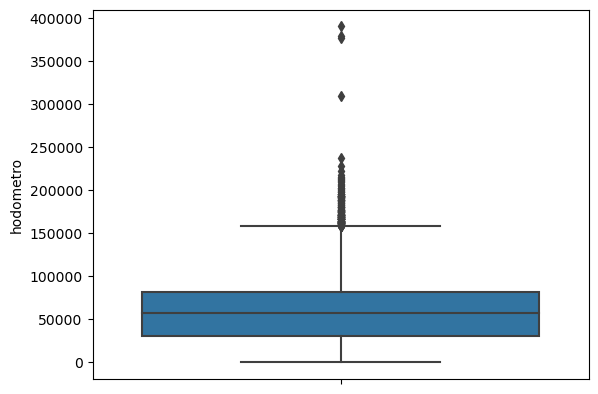

<IPython.core.display.Javascript object>

In [40]:
# Boxplot
sns.boxplot(y=df["hodometro"])

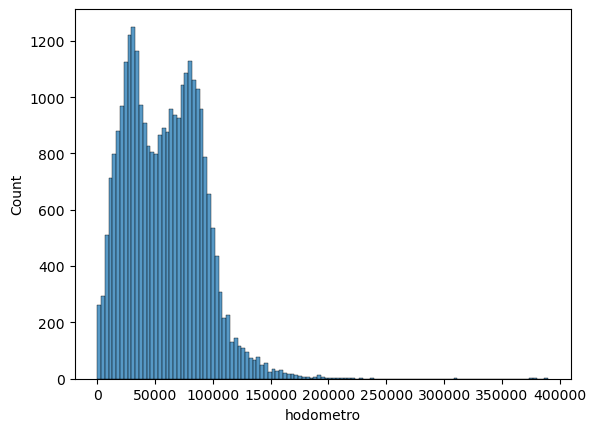

<IPython.core.display.Javascript object>

In [41]:
# Histograma
sns.histplot(df["hodometro"])

A proximidade entre os valores da média e da mediana, assim como a posição da mediana no Boxplot nos mostra que temos uma distribuição que se aproxima de uma distribuição normal. O Boxplot também mostra a existência de valores outliers tornando nossos dados mais dispesrsos e explicando uma média um pouco mais elevada que a mediana. 

O Histograma mostra dois picos de concentração maior dos dados, por volta dos 30000 e 80000. Também é possível perceber uma cauda alongada até próximo ao valor 40000.

### Análise da Variável num_portas

In [24]:
# Calculando as medidas de tendência central

# Média
mean_portas = round(df["num_portas"].mean(), 2)

# Mediana
median_portas = df["num_portas"].median()

# Moda
moda_portas = statistics.mode(df["num_portas"])

# Calculando as medias de dispersão

# Desvio Padrão
std_portas = np.std(df["num_portas"])
std_portas = np.around(std_portas, 2)

# Variância
var_portas = np.var(df["num_portas"])
var_portas = np.around(var_portas, 2)

# Amplitude
amp_portas = df["num_portas"].max() - df["num_portas"].min()

print(
    f" As estatísticas referentes a medidas de tendência central para a variável num_fotos são:\n Media: {mean_portas}\n Mediana: {median_portas}\n Moda: {moda_portas}\n\n As estatísticas referentes a medidas de dispersão para a variável num_fotos são:\n Desvio Padrão: {std_portas}\n Variância: {var_portas}\n Amplitude: {amp_portas}"
)

 As estatísticas referentes a medidas de tendência central para a variável num_fotos são:
 Media: 3.94
 Mediana: 4.0
 Moda: 4

 As estatísticas referentes a medidas de dispersão para a variável num_fotos são:
 Desvio Padrão: 0.34
 Variância: 0.11
 Amplitude: 2


<IPython.core.display.Javascript object>

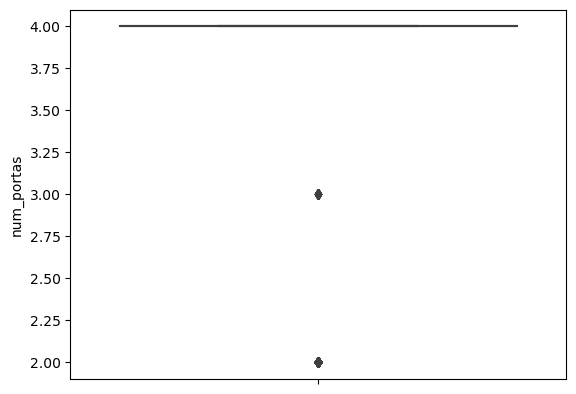

<IPython.core.display.Javascript object>

In [42]:
# Boxplot
sns.boxplot(y=df["num_portas"])

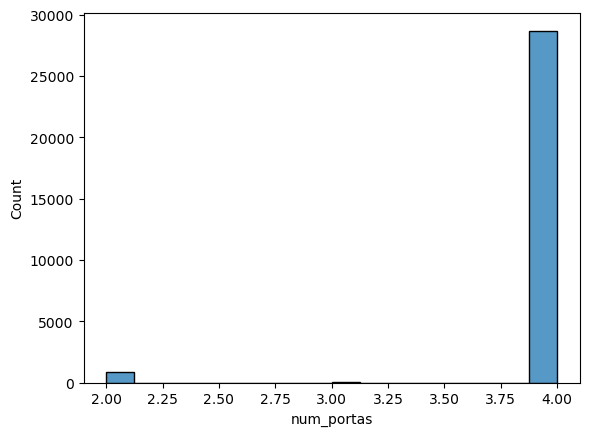

<IPython.core.display.Javascript object>

In [43]:
# Histograma
sns.histplot(df["num_portas"])

A variável num_portas possui a característica peculiar de que 97% dos seus dados possuem o mesmo valor (4) e os demais possuem o valor 2. Isto faz com o que nosso boxplot seja apenas uma linha, pois todos os pontos do boxplot (limite inferior, 1º quartil, mediana, 3º quartil e limite superior) acabam sendo 4. Os demais valores, acabam se tornando outliers.

## Tabela com o Resumo Estatístico dos Dados

In [27]:
estatisticas = pd.DataFrame(
    {
        "variavel": [
            "num_fotos",
            "ano_de_fabricacao",
            "ano_modelo",
            "hodometro",
            "num_portas",
        ],
        "media": [
            mean_num_fotos,
            mean_ano_fabric,
            mean_ano_modelo,
            mean_hodometro,
            mean_portas,
        ],
        "mediana": [
            median_num_fotos,
            median_ano_fabric,
            median_ano_modelo,
            median_hodometro,
            median_portas,
        ],
        "desvio_padrao": [
            std_num_fotos,
            std_ano_fabric,
            std_ano_modelo,
            std_hodometro,
            std_portas,
        ],
        "variancia": [
            var_num_fotos,
            var_ano_fabric,
            var_ano_modelo,
            var_hodometro,
            var_portas,
        ],
        "ambplitude": [
            amp_num_fotos,
            amp_ano_fabric,
            amp_ano_modelo,
            amp_hodometro,
            amp_portas,
        ],
    },
)

<IPython.core.display.Javascript object>

In [28]:
# Tornando a variável estatistica o index
estatisticas.set_index("variavel")

,media,mediana,desvio_padrao,variancia,ambplitude
variavel,,,,,
num_fotos,10.31,8.00,3.48,12.00,13.00
ano_de_fabricacao,2016.76,2018.00,4.06,16.50,37.00
ano_modelo,2017.81,2018.00,2.67,7.15,26.00
hodometro,58430.59,57434.00,32561.22,1060232981.27,389965.00
num_portas,3.94,4.00,0.34,0.11,2.00


<IPython.core.display.Javascript object>